# Visualization of Results Notebook

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import entropy
# %matplotlib inline
# %matplotlib notebook

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 20, 20

In [3]:
def grid(nbins=5, mins=np.zeros(1), maxs=np.ones(1) ):
    dim = len(mins)
    S = np.array( np.meshgrid(*[np.linspace(i,j,nbins) for i,j in zip(mins+1./(2*nbins), maxs-1./(2*nbins))]) )
    SS = S.ravel().reshape(dim,nbins**dim).T
    return SS

In [11]:
problem = 'ed'

In [12]:
### DO NOTE CHANGE ### 
nbins = 250
Vobs_len = np.array([1, 2 , 3, 4])
Vstart_time = np.array([0.25, 0.5, 1])
Vtrue_observational_variance = np.array([0.0125, 0.025, 0.05]) 
Vnum_observations = np.array([2, 5, 10, 25, 50])

if problem == 'ed':
    mins = np.array([0, 0]) # original domain
    maxs = np.array([1, 1])
    Dg = np.load("savefiles/ED_savefile_gridsearch_allruns_fine.npy")

elif problem == 'ho':
    mins = np.array([-0.25, .5]) # original domain
    maxs = np.array([0.25, 1.5])
    Dg = np.load("savefiles/HO_savefile_gridsearch_allruns_fine.npy")
        

X = grid(nbins, mins, maxs)
xi = X[:,1].reshape(nbins, nbins)
yi = X[:,0].reshape(nbins, nbins) 
### DO NOTE CHANGE ### 

# Individual Plot

HO_M10_25E_[1000_1000]ms


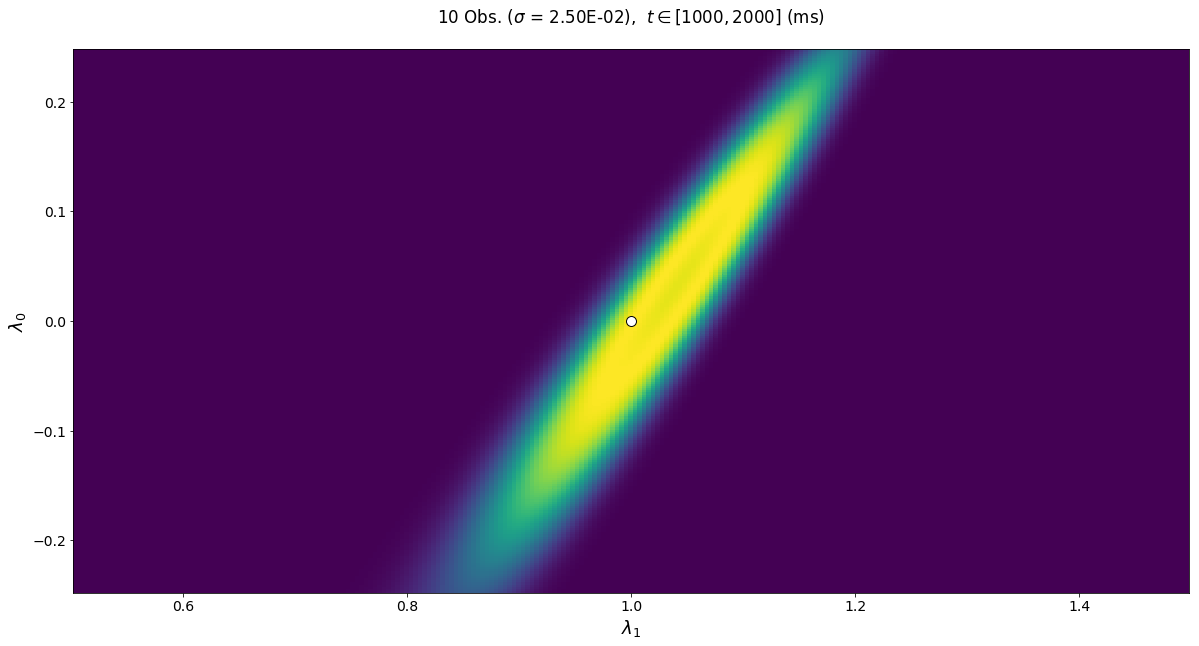

In [9]:
num_obs = 10
error = 0.025
start_time = 1
observation_len = 1
if problem == 'ho':
    plt.figure(figsize=(20, 10))
if problem == 'ed':
    plt.figure(figsize=(20, 20))
    
for run_num in range(len(Dg)):
    if np.sum(np.abs(np.array(Dg[run_num]['t']) - np.array([num_obs, error, start_time, observation_len]))) == 0:
        post_eval = Dg[run_num]['p']
        zi = post_eval.reshape(nbins, nbins)
        plt.cla()
        plt.pcolormesh(xi, yi, zi)
        # plt.pcolormesh(zi)
        if problem == 'ho':
            plt.scatter([1], [0], c='white', edgecolor='black', s=100)
        elif problem == 'ed':
            plt.scatter([0.5], [0.5], c='white', edgecolor='black', s=100)    
        plt.ylabel('$\lambda_0$', fontsize=18)
        plt.xlabel('$\lambda_1$', fontsize=18)
        plt.title('%d Obs. ($\sigma$ = %.2E),  $t \in [%d, %d]$ (ms)\n'%(num_obs, error, 1000*start_time, 1000*(start_time+observation_len)))
        save_str = '%s_M%d_%dE_[%d_%d]ms'%(problem.upper(),num_obs, 1000*error, 1000*start_time, 1000*observation_len)
        print(save_str)
#         plt.savefig('saveimgs/%s.png'%save_str)
        plt.show()

# Grid Plot - The Effect of Sampling Duration and Frequency
## (Fixed Error and Starting Time)

Exponential Decay problem with start time 250 (ms) with ($\sigma$ = 2.50E-02)


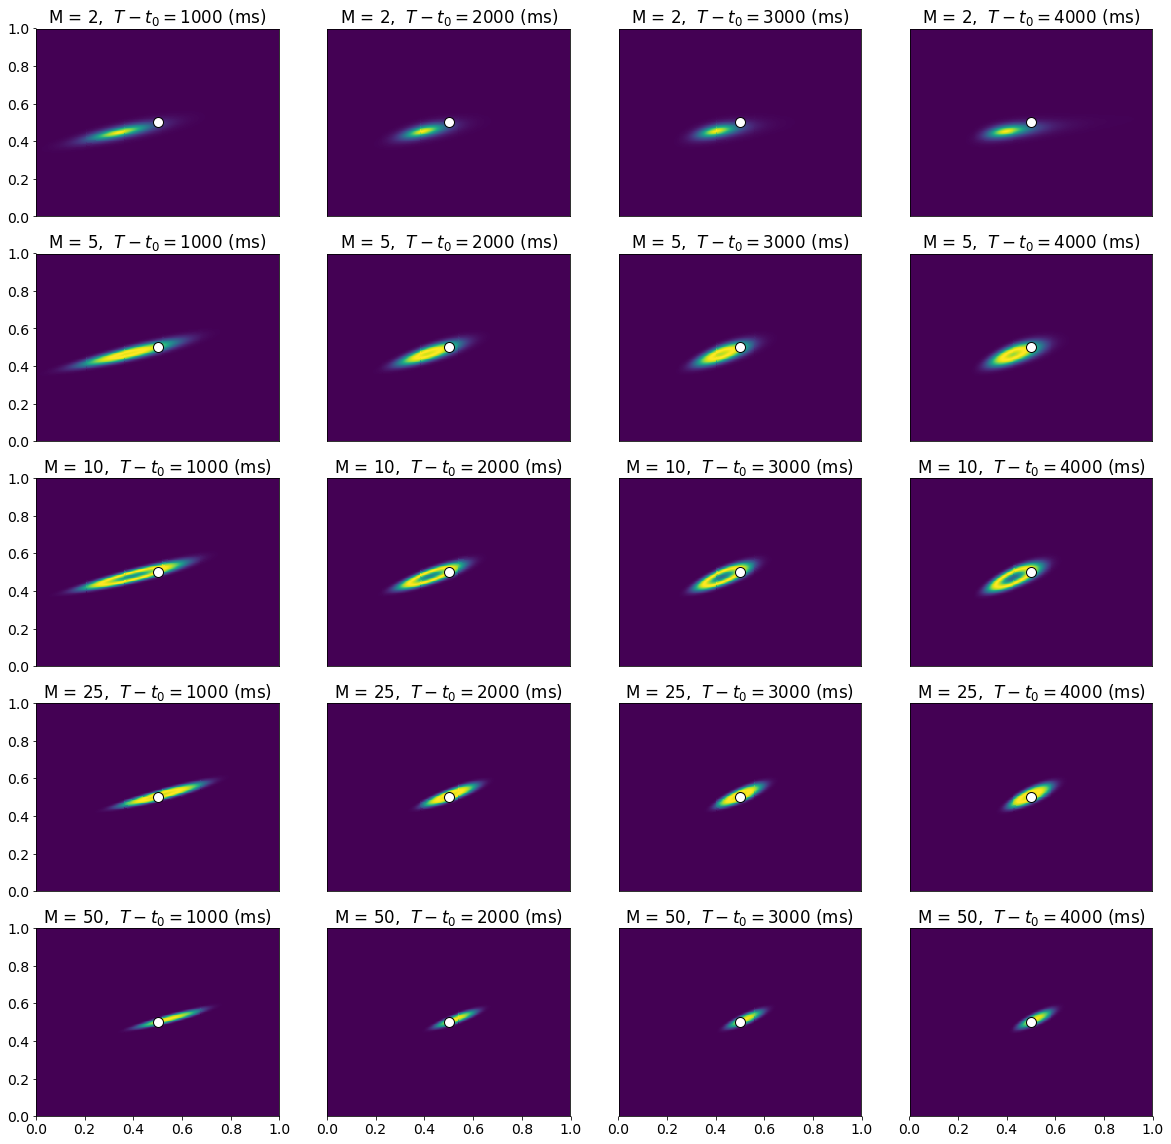

In [15]:
f, axarr = plt.subplots(len(Vnum_observations),len(Vobs_len),figsize=[20,20])
error = 0.025
start_time = 0.25

for i in range(len(Vnum_observations)):
    num_obs = Vnum_observations[i]
    for j in range(len(Vobs_len)):
        observation_len = Vobs_len[j]
        for run_num in range(len(Dg)):
            if np.sum(np.abs(np.array(Dg[run_num]['t']) - np.array([num_obs, error, start_time, observation_len]))) == 0:
                post_eval = Dg[run_num]['p']
                zi = post_eval.reshape(nbins, nbins)               
                axarr[i,j].pcolormesh(xi, yi, zi)
                # plt.pcolormesh(zi)
                if problem == 'ho':
                    axarr[i,j].scatter([1], [0], c='white', edgecolor='black', s=100)
                elif problem == 'ed':
                    axarr[i,j].scatter([0.5], [0.5], c='white', edgecolor='black', s=100) 
                axarr[i,j].set_title('M = %d,  $T-t_0 = %d$ (ms)'%(num_obs, 1000*observation_len))

                if j>0:
                    axarr[i,j].set_yticks([], minor=False)
                if i<4:
                    axarr[i,j].set_xticks([], minor=False)
#                 if j>0 and i<3:
#                     axarr[i,j].set_yticks([], minor=False)
#                     axarr[i,j].set_xticks([], minor=False)
if problem == 'ed':
    pstr = 'Exponential Decay'
elif problem == 'ho':
    pstr = 'Harmonic Oscillator'
else:
    pstr = 'SIR Model'
print('%s problem with start time %d (ms) with ($\sigma$ = %.2E)'%(pstr, 1000*start_time, error))
plt.show()


# Statistical Analysis

This is for the studies on observational variance vs true variance.

In [ ]:
# Dg = np.load("savefile_gridsearch_fix_window.npy")
# E = []
# T = []
# T0 = []
# fix_time = int(window_length[0])
# fix_obs = int(num_observations[1])
# fix_sd_true = 0.0125
# fix_sd_guess = fix_sd_true
# for D in Dg:
#     n = int(D['n'])
#     sample_err_1 = D['a'][0]
#     sample_err_2 = D['a'][1]
#     pf_rel_err_mean = D['r'][0]
#     pf_rel_err_std = D['r'][1]
#     num_obs, sd_true, sd_guess, max_time = D['t']
#     if sd_true == fix_sd_true and sd_guess == fix_sd_guess and max_time == fix_time:
#         if num_obs == num_observations[0]:
#             T0.append([ num_obs, entropy(D['p']), sample_err_1, sample_err_2 ])
#             ref = D['p']
#         else:
#             T0.append([ num_obs, entropy(D['p'],ref), sample_err_1, sample_err_2 ])
# #             print(entropy(D['p'], ref))
# #             print(pf_rel_err_mean)
#             ref = D['p']
#     if num_obs == fix_obs and max_time == fix_time:
#         T.append([sd_true, sd_guess, pf_rel_err_mean, pf_rel_err_std])
    
#     if num_obs == fix_obs and sd_true == fix_sd_true and sd_guess == fix_sd_guess:
#         if max_time == window_length[0]:
#             E.append([ max_time, entropy(D['p']), sample_err_1, sample_err_2 ])
#             ref = D['p']
#         else:
#             E.append([ max_time, entropy(D['p'],ref), sample_err_1, sample_err_2 ])
#             ref = D['p']
            
# E = np.array(E)
# T = np.array(T)
# T0 = np.array(T0)
# plt.close('all')
# plt.subplots(1,3)

# plt.subplot(131)
# xi = T[:,0].reshape(len(true_observational_variance),len(perceived_observational_variance))
# yi = T[:,1].reshape(len(true_observational_variance),len(perceived_observational_variance))
# zi = T[:,3].reshape(len(true_observational_variance),len(perceived_observational_variance))
# plt.pcolormesh(xi, yi, zi)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylabel('guess at error model')
# plt.xlabel('true error model')
# plt.title('error, fix_obs = %d, fix_time = %d'%(fix_obs, fix_time))
# plt.savefig('testfig.png')

# plt.subplot(132)
# plt.cla()
# plt.plot(T0[:,0], T0[:,2], label='err in lam_1')
# print(np.max(T0[:,2]))
# plt.plot(T0[:,0], T0[:,3], label='err in lam_2')
# plt.plot(T0[:,0], T0[:,1], label='KL divergence')
# plt.plot(num_observations, .1/num_observations, label='MC Rate', c='k')

# plt.legend(fontsize=12, framealpha=0.5,loc='upper right')
# plt.title('time = %d'%fix_time)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1E-10, 10])
# plt.xlabel('num obs')
# plt.ylabel('error')

# plt.subplot(133)
# plt.cla()
# plt.plot(E[:,0], E[:,2], label='err in lam_1')
# plt.plot(E[:,0], E[:,3], label='err in lam_2')
# plt.plot(E[:,0], E[:,1], label='KL divergence')
# plt.plot(window_length, .1/window_length, label='MC Rate', c='k')

# plt.legend(fontsize=12, framealpha=0.5,loc='upper right')
# plt.title('fix_obs = %d, fix_sd = (%.2e, %.2e)'%(fix_obs, fix_sd_true, fix_sd_guess))
# plt.yscale('log')
# plt.xscale('log')
# plt.ylabel('error')
# plt.ylim([1E-8, 10])
# plt.xlabel('max time')

# plt.show()


In [ ]:
# plt.cla()
# plt.plot(T0[:,0], T0[:,2], label='err in lam_1')
# plt.plot(T0[:,0], T0[:,3], label='err in lam_2')
# plt.plot(T0[:,0], T0[:,1], label='KL divergence')
# plt.plot(num_observations, .1/num_observations, label='MC Rate', c='k')

# plt.legend(fontsize=12, framealpha=0.5,loc='upper right')
# plt.title('time = %d'%fix_time)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1E-8, 10])
# plt.xlabel('num obs')
# plt.ylabel('error')

# Exponential Decay

In [ ]:
### DO NOTE CHANGE ### 
nbins = 250
mins = np.array([0, 0]) # original domain
maxs = np.array([1, 1])
X = grid(nbins, mins, maxs)
xi = X[:,1].reshape(nbins, nbins)
yi = X[:,0].reshape(nbins, nbins) 
### DO NOTE CHANGE ### 

f, axarr = plt.subplots(len(Vnum_observations),len(Vobs_len),figsize=[20,20])

error = 0.05
start_time = 0.25

for i in range(len(Vnum_observations)):
    num_obs = Vnum_observations[i]
    for j in range(len(Vobs_len)):
        observation_len = Vobs_len[j]
        for run_num in range(len(Dg)):
            if np.sum(np.abs(np.array(Dg[run_num]['t']) - np.array([num_obs, error, start_time, observation_len]))) == 0:
                post_eval = Dg[run_num]['p']
                zi = post_eval.reshape(nbins, nbins)               
                axarr[i,j].pcolormesh(xi, yi, zi)
                # plt.pcolormesh(zi)
                axarr[i,j].scatter([0.5], [0.5], c='white', edgecolor='black', s=100)
                axarr[i,j].set_title('M = %d  $T-t_0 = %d$ (ms)'%(num_obs, 1000*observation_len))

                if j>0:
                    axarr[i,j].set_yticks([], minor=False)
                if i<4:
                    axarr[i,j].set_xticks([], minor=False)
#                 if j>0 and i<3:
#                     axarr[i,j].set_yticks([], minor=False)
#                     axarr[i,j].set_xticks([], minor=False)
print('Start time %d (ms) with ($\sigma$ = %.2E)'%(1000*start_time, error))
plt.show()

## The Effect of Sampling Duration and Frequency

In [ ]:
# Make the plot
### DO NOTE CHANGE ### 
nbins = 250

X = grid(nbins, mins, maxs)
xi = X[:,1].reshape(nbins, nbins)
yi = X[:,0].reshape(nbins, nbins) 
### DO NOTE CHANGE ### 

num_obs = 50
error = 0.025
start_time = 0.25
observation_len = 2

# num_obs = 5
# error = 0.0125
# start_time = 1
# observation_len = 1
plt.figure(figsize=(20, 20))



In [ ]:
axarr[0,0].set

In [ ]:
axarr[0,0]

In [ ]:
save_str = 'ED_M%d_%dE_[%d_%d]ms'%(num_obs, 1000*error, 1000*start_time, 1000*observation_len)
print(save_str)
plt.savefig('saveimgs/%s.eps'%save_str)